## **Water Quality Prediction using Machine Learning Algorithm**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [7]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**Data** **Preprocessing**

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [9]:
df.shape

(3276, 10)

In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
  df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
df.isnull().mean()

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

**Filling Missing Values**

In [14]:
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [15]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

#Data visualizations

<Axes: >

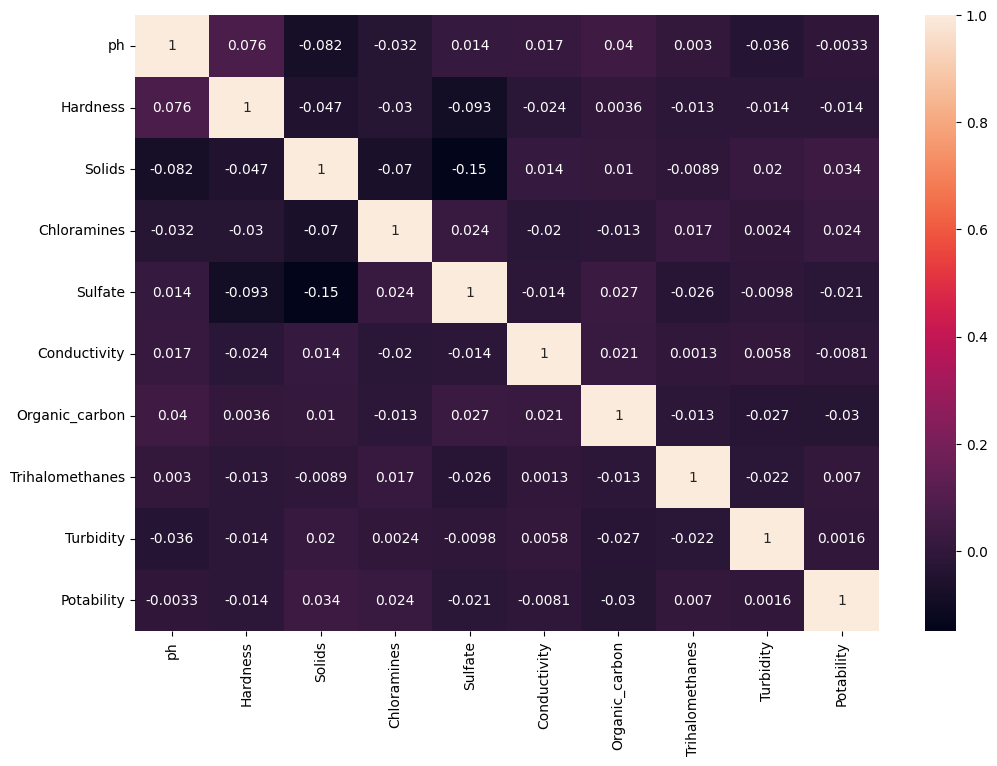

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

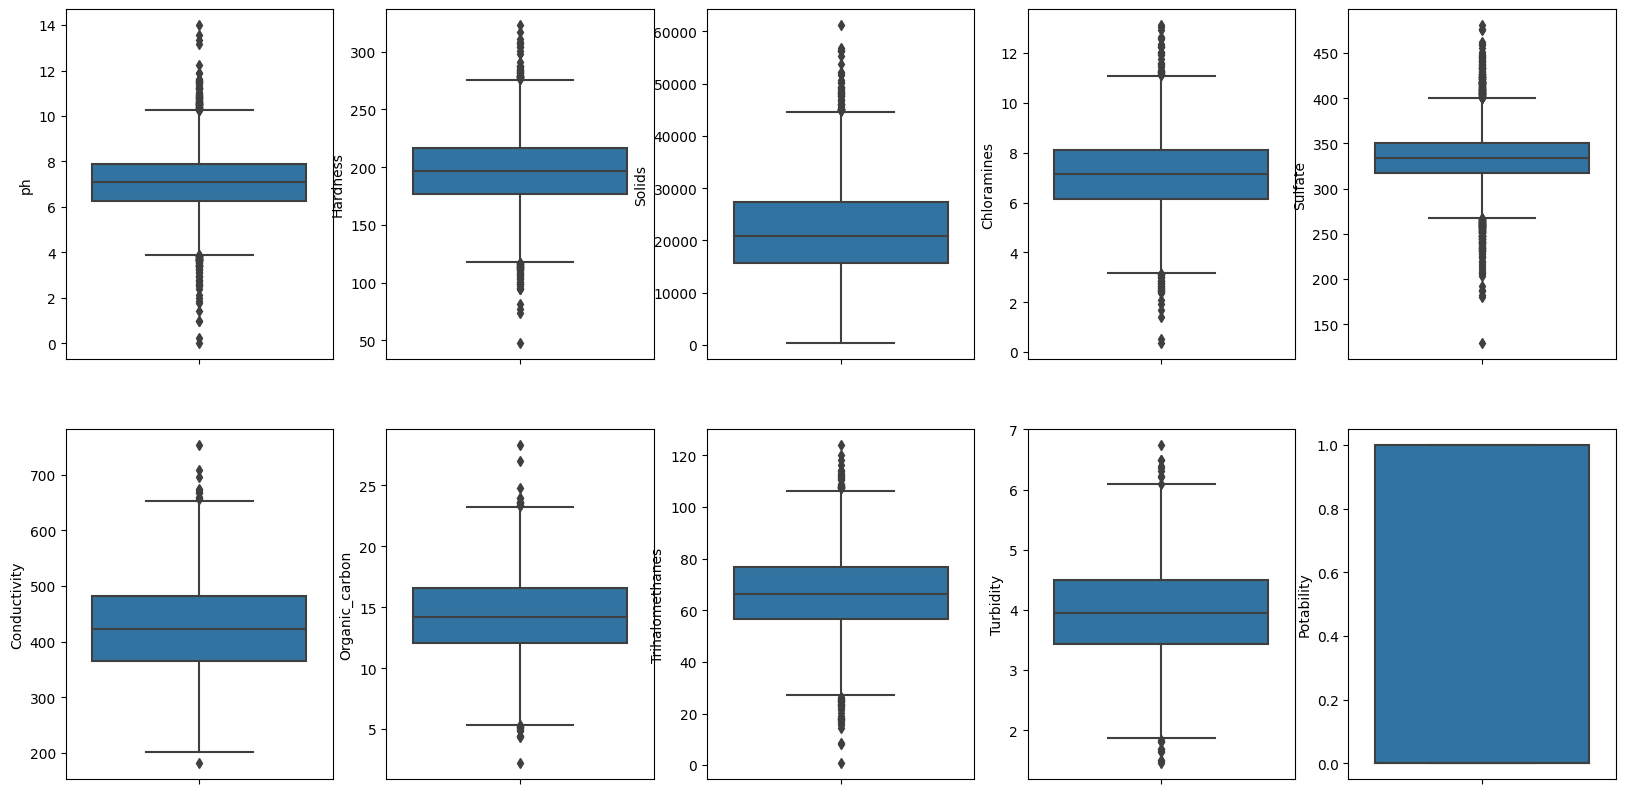

In [18]:
fig,ax = plt.subplots(ncols=5, nrows=2, figsize = (20,10))
ax = ax.flatten()
index = 0

for col,values in df.items():
  sns.boxplot(y=col,data=df,ax=ax[index])

  index +=1


<Axes: xlabel='Potability', ylabel='count'>

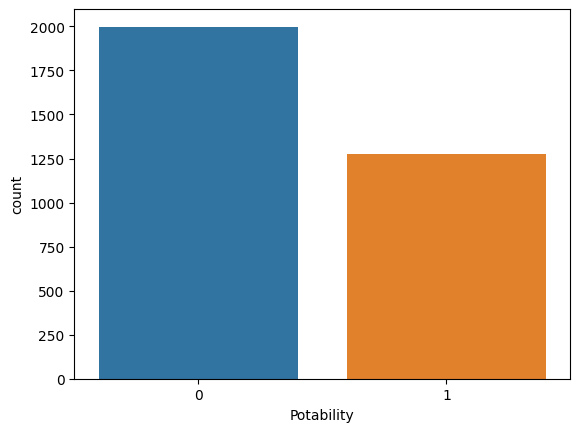

In [19]:
sns.countplot(x="Potability",data=df)

In [20]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

In [21]:
import plotly.express as px

In [22]:
fig = px.pie(df,names = "Potability",hole = 0.4)
fig.show()

In [23]:
fig = px.scatter(df,x = "ph",y="Sulfate",color = 'Potability', template='plotly_dark')
fig.show()

In [24]:
fig = px.scatter(df,x = "Organic_carbon",y="Sulfate",color = 'Potability', template='plotly_dark')
fig.show()

<Axes: >

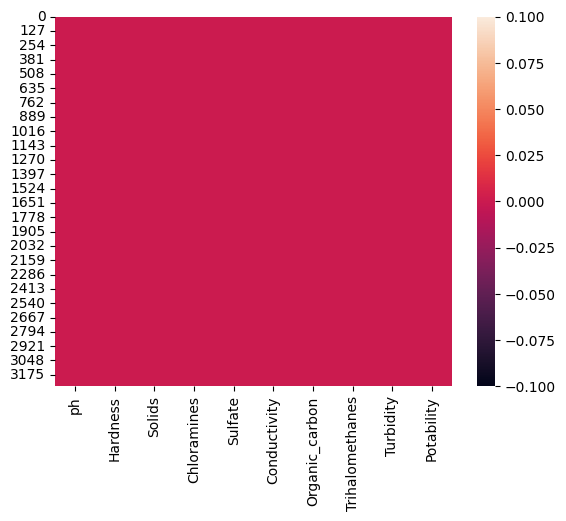

In [25]:
 #after filling null values
 sns.heatmap(df.isnull())

In [26]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
x = df.drop("Potability",axis=1)
y = df["Potability"]

In [28]:
x.shape , y.shape

((3276, 9), (3276,))

In [29]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

#Splitting the dataset into training and testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [32]:
x_train.shape , x_test.shape

((2620, 9), (656, 9))

#Logistic Regression

In [33]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()


In [34]:
#Training our model
model_lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
#Making the Prediction
pred_lr = model_lr.predict(x_test)

In [36]:
#accuracy score
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

62.80487804878049

In [37]:
#confusion matrix
cm1 = confusion_matrix(y_test,pred_lr)
cm1

array([[412,   0],
       [244,   0]])

#Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
#creating the model object
model_dt = DecisionTreeClassifier(max_depth = 4)


In [40]:
#Training of decision tree
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [41]:
#making prediction using Decision Tree
pred_dt = model_dt.predict(x_test)

In [42]:
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

63.5670731707317

In [43]:
#confusion matrix
cm2 = confusion_matrix(y_test,pred_dt)
cm2

array([[368,  44],
       [195,  49]])

#Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_rf = RandomForestClassifier()

In [46]:
#Training model RF
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
#Making prediction
pred_rf = model_rf.predict(x_test)

In [48]:
accuracy_score_rf = accuracy_score(y_test,pred_rf)

In [49]:
accuracy_score_rf*100

67.07317073170732

In [50]:
cm3 = confusion_matrix(y_test,pred_rf)
cm3

array([[366,  46],
       [170,  74]])

#KNN--K-Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

#creating  Model object
#model_knn = KNeighborsClassifier()

In [52]:
for i in range (3,12):
  model_knn = KNeighborsClassifier(n_neighbors=i)
  model_knn.fit(x_train,y_train)
  pred_knn = model_knn.predict(x_test)
  accuracy_score_knn = accuracy_score(y_test,pred_knn)
  print(i,accuracy_score_knn)


3 0.6265243902439024
4 0.6387195121951219
5 0.6051829268292683
6 0.635670731707317
7 0.6326219512195121
8 0.6387195121951219
9 0.6387195121951219
10 0.6387195121951219
11 0.6463414634146342


In [53]:
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)
accuracy_score_knn = accuracy_score(y_test,pred_knn)
print(i,accuracy_score_knn)


11 0.6463414634146342


# Support Vector Machine

In [54]:
from sklearn.svm import SVC

#model the object
model_svm = SVC(kernel="rbf")

In [55]:
#Train the model
model_svm.fit(x_train,y_train)

SVC()

In [56]:
#make prediction

pred_svm = model_svm.predict(x_test)

In [57]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

69.20731707317073

In [58]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "KNN",
              "Random Forest",
              "SVM"],
    "Accuracy score": [accuracy_score_lr,accuracy_score_dt,accuracy_score_rf,
                       accuracy_score_knn,accuracy_score_svm]
})

In [59]:
models

,Model,Accuracy score
0,Logistic Regression,0.628049
1,Decision Tree,0.635671
2,KNN,0.670732
3,Random Forest,0.646341
4,SVM,0.692073


,Model,Accuracy score
4,SVM,0.692073
2,KNN,0.670732
3,Random Forest,0.646341
1,Decision Tree,0.635671
0,Logistic Regression,0.628049


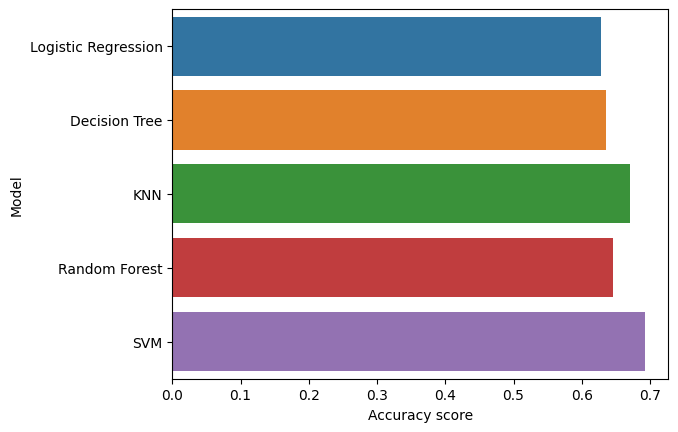

In [63]:
sns.barplot(x="Accuracy score",y= "Model",data=models)
models.sort_values(by="Accuracy score",ascending= False)